## Importing key libraries 

In [1]:
# Import these libraries: Geopandas, Pandas and Matplotlip.pyplot
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt



# Buffer analysis basics


<div class="alert alert-block alert-info">
    
<b>Instructions:</b> 


* <span style='font-family:Georgia'> Read the Swimming Pool Dataset (swimming_pools.shp) in the Workshop2Data folder
    
* <span style='font-family:Georgia'> Display the first five rows of the dataset.
 
</div>

In [2]:
pool = gpd.read_file("data/pool/swimming_pools.shp")
pool.head(5)

,OBJECTID,NAME,PARK_NAME,ADDRESS_91,ZIP_CODE,POOL_TYPE,POOL_STATU,COMMENTS,DATE_INSTA,DATA_SOURC,geometry
0,1,Fox Chase Pool,Fox Chase Recreation Center,7901 RIDGEWAY ST,19111,OUTDOOR,ACTIVE,None,None,Finder; Previous GIS Data,POINT (-75.08232 40.07367)
1,2,Mitchell Pool,Thomas Mitchell Memorial Playground,3600 WHITEHALL LN,19114,OUTDOOR,ACTIVE,None,2012-01-01,Capital 2019; Finder,POINT (-74.99143 40.06830)
2,3,Jardel Pool,Thomas E. Jardel Memorial Field,1400 COTTMAN AVE,19111,OUTDOOR,ACTIVE,None,None,Finder; Previous GIS Data,POINT (-75.07590 40.05629)
3,4,Jacobs Pool,George Jacobs Playground,4500 LINDEN AVE,19136,OUTDOOR,ACTIVE,None,None,Aquatics 2019; Finder,POINT (-75.00284 40.05266)
4,5,Morris Estates Pool,Morris Estate Cultural Center,1610 CHELTEN AVE,19141,OUTDOOR,ACTIVE,Emergency access is from Chelten around the bu...,None,Finder; Administration,POINT (-75.14641 40.04992)


<div class="alert alert-block alert-info">
    
* <span style='font-family:Georgia'> Plot the swimming pools data with Geopandas. 
 
</div>

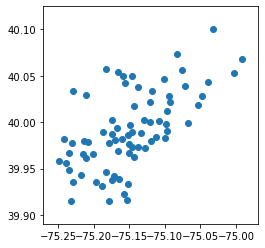

In [3]:
pool.plot()

<div class="alert alert-block alert-info">
    
* <span style='font-family:Georgia'> Find the the swimming pool with the following name "Jardel Pool". Plot Jardel Pool. 
 
</div>

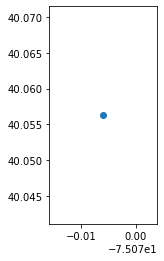

In [4]:
jp = pool[pool["NAME"] == "Jardel Pool"]
jp.plot()

<div class="alert alert-block alert-info">
    
* <span style='font-family:Georgia'> Create the buffer around the Jardel Pool with a distance of your choice (e.g. 10 units). 
 
</div>

In [13]:
jp_buf = jp.buffer(0.01)

C:\Users\yeshw\AppData\Local\Temp\ipykernel_21536\1497143889.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  jp_buf = jp.buffer(0.01)



<div class="alert alert-block alert-info">
    
* <span style='font-family:Georgia'> Plot the buffered point around the Jardel Pool  . 
 
</div>

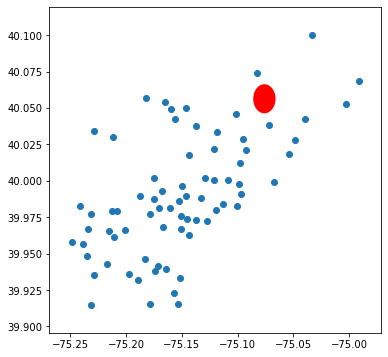

In [14]:
fig, ax = plt.subplots(figsize=(8,6))
pool.plot(ax=ax)
jp_buf.plot(ax=ax, color="red")
plt.show()


<div class="alert alert-block alert-info">
    
* <span style='font-family:Georgia'> Which number did you choose for the distance?. 
 
</div>

<div class="alert alert-block alert-info">
    
* <span style='font-family:Georgia'> Is it meters, Kilometers, foot or something else? How do you know it? (Hint: Check the CRS)
 
</div>

In [15]:
jp.crs
# it is in degree's as we didn't change it

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich


<div class="alert alert-block alert-info">
    
<b>Instructions:</b> 


* <span style='font-family:Georgia'> Can you find out a CRS that uses Meters  as Unit of measurement? (Hint: search in https://epsg.io/)
    
* <span style='font-family:Georgia'> If you manage to find out a CRS that has meter as unit of measure, set the CRS of the swimming pool to the meter based CRS. 
 
</div>

In [16]:
pool = pool.to_crs(epsg=3763)



<div class="alert alert-block alert-info">
    
* <span style='font-family:Georgia'> Check if the CRS is changed and meter is the unit of measurement (HINT: .crs)
 
</div>

In [17]:
pool.crs

<Derived Projected CRS: EPSG:3763>
Name: ETRS89 / Portugal TM06
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Portugal - mainland - onshore.
- bounds: (-9.56, 36.95, -6.19, 42.16)
Coordinate Operation:
- name: Portugual TM06
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich


<div class="alert alert-block alert-info">
    
* <span style='font-family:Georgia'> Now, buffer a distance of your choice (in meters) on Jardel swimming pool. Plot the buffered point.
 
</div>



In [18]:
jp = pool[pool["NAME"] == "Jardel Pool"]
jp_buf = jp.buffer(1000)

<div class="alert alert-block alert-info">
    
* <span style='font-family:Georgia'> Plot the buffered point.
 
</div>

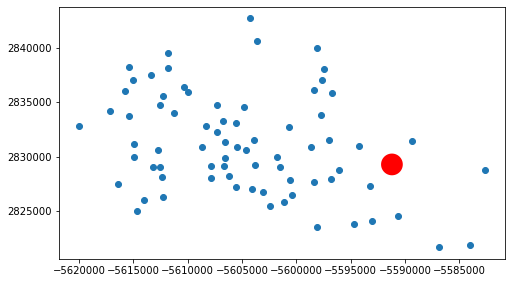

In [19]:
fig, ax = plt.subplots(figsize=(8,6))
pool.plot(ax=ax)
jp_buf.plot(ax=ax, color="red")
plt.show()

# Buffer analysis - real world application


<div class="alert alert-block alert-info">
    
 <span style='font-family:Georgia'> An avaiation company, ABC, is planning to expand its flight services from Doha. The constraint however is that all the new flight services must be within 1000 kilometre range. Using your Geospatial Analysis skill, can you please tell whether a new flight service to Abu Dhabi from Doha is feasible?
 
</div>

<div class="alert alert-block alert-info">
    
 <span style='font-family:Georgia'> HINT: Please note that Doha and Abu Dhabi are capital cities. Can you use a dataset already available with GeoPandas library (gpd.datasets.available) to locate the geometry points for these cities.
 
</div>

In [20]:
# Let us see what data is available in Geopandas
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

In [33]:
cities = gpd.read_file(gpd.datasets.get_path("naturalearth_cities"))
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

In [22]:
doha = cities[cities["name"]=="Doha"]
abu_dhabi = cities[cities["name"]=="Abu Dhabi"]
coi = gpd.GeoDataFrame( pd.concat( [doha, abu_dhabi], ignore_index=True) )
coi.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [34]:
coi = coi.to_crs(3763)
world = world.to_crs(3763)
coi.crs

<Derived Projected CRS: EPSG:3763>
Name: ETRS89 / Portugal TM06
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Portugal - mainland - onshore.
- bounds: (-9.56, 36.95, -6.19, 42.16)
Coordinate Operation:
- name: Portugual TM06
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

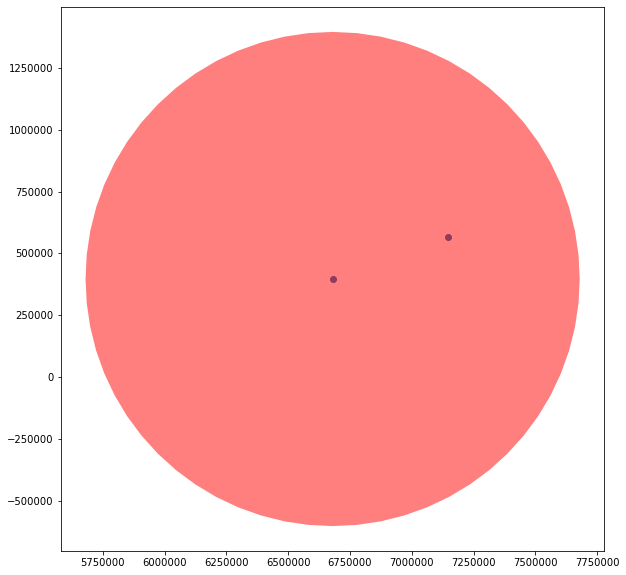

In [45]:
doha = coi[coi["name"]=="Doha"]
doha = doha.buffer(1000*1000) # 1km = 1000kms

fig, ax = plt.subplots(figsize=(10,10))
coi.plot(ax=ax)
doha.plot(ax=ax, color="red", alpha=0.5)
plt.show()

# Workshop deliverable

You are required to submit a copy of this solved Jupyter notebook through the Workshop 5 Submission Point on the Moodle. Since this is a teamwork so your work will most likely be identical to your team members. Despite that each team member should submit independently.